IMPORTING LIBRARIES:

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET:

In [27]:
data = pd.read_csv(r"/Users/Mouna_sk2005/Downloads/spam.csv", encoding='latin-1')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [29]:
data = data[['v1', 'v2']]  
data.columns = ['label', 'message']

In [30]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

VISUALISING THE DATA:

/var/folders/ww/3j826drd4ps4ytt4zpf7035r0000gp/T/ipykernel_2111/309725536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


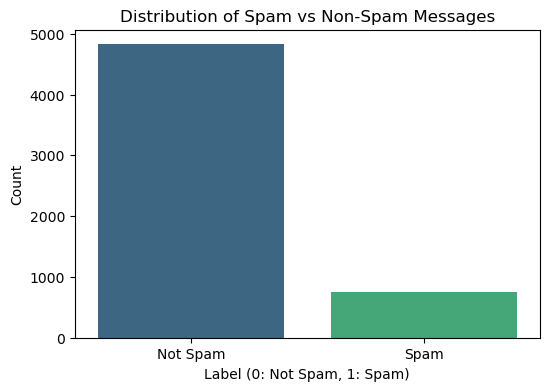

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Spam vs Non-Spam Messages')
plt.xlabel('Label (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

SPILTTING DATA SET INTO TRAIN AND TEST SETS:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

FEATURE EXTRACTION USING TF-IDF:

In [33]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

TRAINING THE LOGISTIC REGRESSION MODEL:

In [34]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test_tfidf)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 96.8609865470852


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



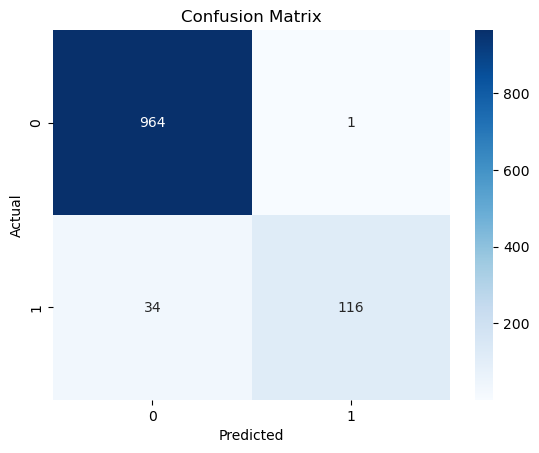

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()